<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">Kaggle Competition: Costa Rican Household Poverty Level Prediction</div>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.options.display.max_columns = None
%matplotlib inline

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>A. DATA ANALYSIS 📝</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 6px; line-height: 1; border-radius:10px"><b>1. Report 📝</b></h3>

In [ ]:
# from pandas_profiling import ProfileReport
# ProfileReport(df_train)

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 6px; line-height: 1; border-radius:10px"><b>1. Read Data 📝</b></h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Dataset/Household Poverty/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/Household Poverty/test.csv")

In [ ]:
display(pd.DataFrame(df_train.dtypes).T)
(df_train.dtypes).value_counts().to_frame()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,object,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64,int64,object,object,object,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64


,0
int64,130
float64,8
object,5


Nhìn chung các cột có 3 kiểu dữ liệu chính là `int64`, `float64`, `object`. Ta sẽ đi phân tích kỹ hơn ở các phần tiếp theo.

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 6px; line-height: 1; border-radius:10px"><b>2. Target Distribution 📝</b></h3>

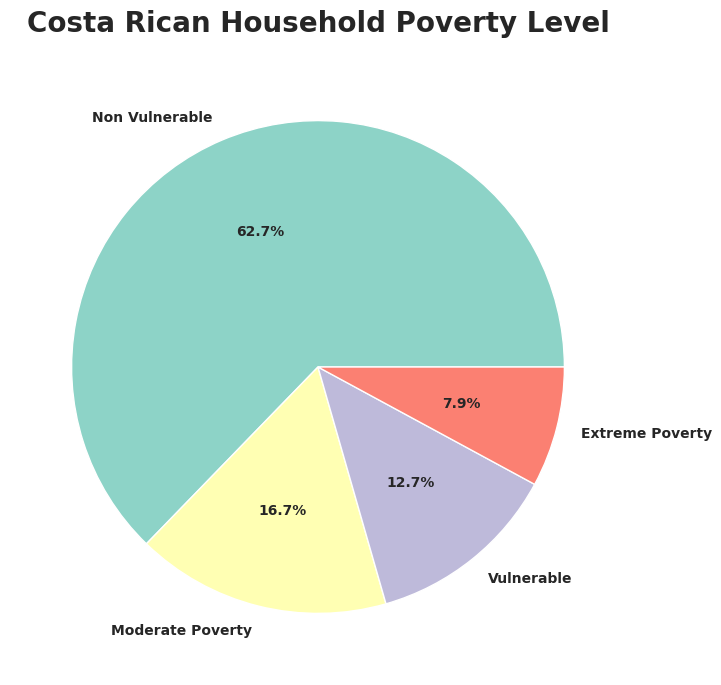

In [ ]:
plt.figure(figsize=(8, 8))
df_train["Target"].value_counts()
levels = {4: "Non Vulnerable", 3: "Vulnerable",2: "Moderate Poverty",  1: "Extreme Poverty"}
count = df_train['Target'].map(levels).value_counts()
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set3"),
        textprops={"fontweight":"black"})
plt.title("Costa Rican Household Poverty Level",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
print('Total', df_train.shape[0], 'samples')
print('Shape', df_train.shape)
missing_ratio = df_train.isnull().sum() / len(df_train) * 100
missing_ratio = missing_ratio[missing_ratio != 0]
missing_ratio.to_frame().rename(columns={0:"Total No. of Missing Values"})

Total 9557 samples
Shape (9557, 143)


,Total No. of Missing Values
v2a1,71.779847
v18q1,76.823271
rez_esc,82.954902
meaneduc,0.052318
SQBmeaned,0.052318


In [ ]:
print('Total', df_test.shape[0], 'samples')
print('Shape', df_test.shape)
missing_ratio = df_test.isnull().sum() / len(df_test) * 100
missing_ratio = missing_ratio[missing_ratio != 0]
missing_ratio.to_frame().rename(columns={0:"Total No. of Missing Values"})

Total 23856 samples
Shape (23856, 142)


,Total No. of Missing Values
v2a1,72.950201
v18q1,75.980885
rez_esc,82.381791
meaneduc,0.129946
SQBmeaned,0.129946


Numerical Columns: int64 & float

In [ ]:
df_train[df_train.duplicated()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


Text(0.5, 1.0, 'int64 columns')

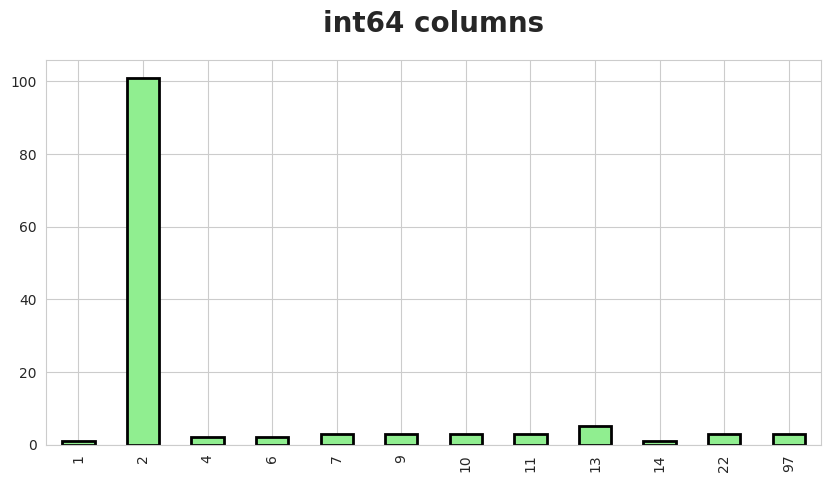

In [ ]:
df_train.select_dtypes('int64').nunique().value_counts().sort_index().plot.bar(color='lightgreen', figsize = (10, 5), edgecolor = 'k', linewidth=2)
plt.title('int64 columns', fontweight="black",size=20,pad=20)

> Số columns có giá trị boolean 0 và 1 chiếm số lượng lớn trong dataset. (Hơn 100).

> Có 2 trường hợp xảy ra:
* Các cột Boolean ở mức độ hộ gia đình:
* Các cột Boolean ở mức độ cá nhân: Về thông tin và trạng thái từng cá nhân trong hộ gia đình.

**Categorical features distribution**

In [ ]:
object_cols = df_train.select_dtypes('object').columns
df_train[object_cols].describe()

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_279628684,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 Inference:</font></h3>

> Note: Bộ dataset có thông tin của tất cả 9557 con người nói riêng và 2988 hộ gia đình nói chung.

> Ngoài ra có các features dạng chuỗi khác như:

`dependency`: tỉ lệ phụ thuộc.

`edjefe` - trình độ giáo dục của chủ hộ là nam.

`edjefa` - trình độ giáo dục của chủ hộ là nữ.

In [ ]:
for i in ['dependency','edjefe','edjefa']:
    print("{} : {}".format(i,list(df_train[i].unique())))

dependency : ['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334', '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4', '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001', '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573', '.16666667', '.60000002']
edjefe : ['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16', '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20']
edjefa : ['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6', '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18']


Các features có cả giá trị dạng chuỗi và dạng số.
* Đối với feature `dependency`, ta có thể tính toán lại bằng cách căn bậc 2 cột `SQBdependency`
* Đối với 2 biến cố còn lại, apply "yes" = 1 và "no" = 0

In [ ]:
mapping = {"yes": 1, "no": 0}

In [ ]:
for df in [df_train, df_test]:
  df['dependency'] = np.sqrt(df['SQBdependency'])
  df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 Inference:</font></h3>

* **Multiclass classification**
* Số lượng label là `Non Vulnerable` - gia đình không thuộc hộ nghèo, chênh lệch khá lớn so với các loại khác.
* **Drop unnecessary columns**: Id, idhogar
* Missing values:
	* Các cột `v2a1` (Chi phí nhà ở hằng tháng), `v18q1` (Số lượng máy tính bảng hộ gia đình sở hữu), `rez_esc` (số năm học muộn so với độ tuổi) có tỉ lệ giá trị thiếu khá lớn ở cả 2 bộ dữ liệu.


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>B. DATA PREPROCESSING 📝</b></h3>

In [ ]:
from sklearn.impute import SimpleImputer

Vì tỷ lệ mising values trên 2 tập train test đều rất lớn ở một số cột. Để thuận tiện cho việc impute dữ liệu thiếu, ta sẽ kết hợp 2 dataframe train test thành một df duy nhất.

In [ ]:
df_test['Target'] = np.nan
# Merge 2 dataset train and test together to handle them at once
df_data = df_train.append(df_test, ignore_index = True)

In [ ]:
print('Total', df_data.shape[0], 'samples')
print('Shape', df_data.shape)
missing_ratio = df_data.isnull().sum() / len(df_data) * 100
missing_ratio = missing_ratio[missing_ratio != 0]
missing_ratio.to_frame().rename(columns={0:"Total No. of Missing Values"})

Total 33413 samples
Shape (33413, 143)


,Total No. of Missing Values
v2a1,72.615449
v18q1,76.221830
rez_esc,82.545716
meaneduc,0.107742
SQBmeaned,0.107742
Target,71.397360


Text(0.5, 1.0, 'Home Ownership Status For Households Missing Rent Payments')

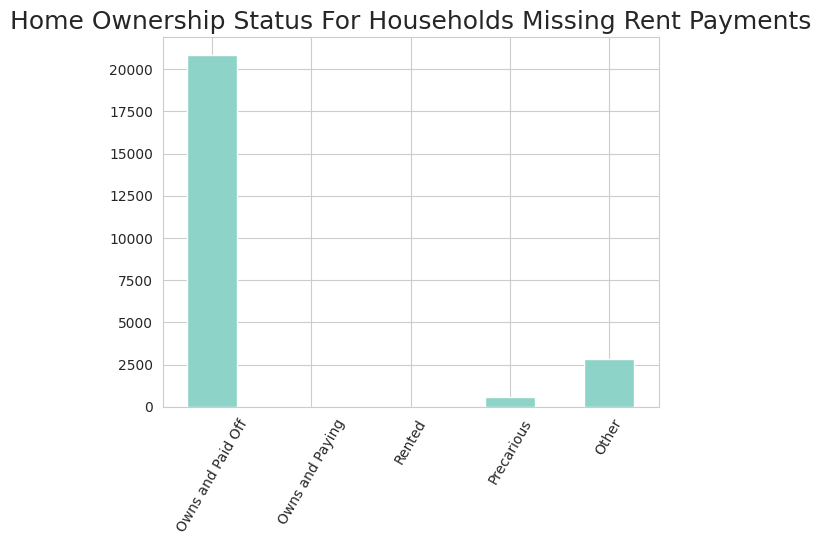

In [ ]:
# Variables indicating home ownership
own_colums = [x for x in df_data if x.startswith('tipo')]

# Visualization thể hiện tình trạng nhà ở của các gia đình mất dữ liệu
df_data.loc[df_data['v2a1'].isnull(), own_colums].sum().plot.bar()
plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)
plt.title('Home Ownership Status For Households Missing Rent Payments', size = 18)

In [ ]:
df_data.loc[df_data['v2a1'].isnull(), own_colums].sum()

tipovivi1    20844
tipovivi2        0
tipovivi3        0
tipovivi4      597
tipovivi5     2822
dtype: int64

In [ ]:
# Số năm học muộn
df_data['rez_esc'].value_counts(dropna=False)

NaN     27581
0.0      4474
1.0       728
2.0       336
3.0       174
4.0        80
5.0        39
99.0        1
Name: rez_esc, dtype: int64

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 Inference:</font></h3>

* Skip `Target` feature vì missing từ tập test. Ta sẽ focuss vào các feature có tỷ lệ missing cao như `rez_esc`, `v18q1`, `v2a1`
* **v18q1**: Hộ gia đình có số máy tính bảng có giá trị nan đơn gian là không sở hữu cái nào hết. Do đó ta sẽ impute giá trị này là 0
* **v2a1: Chi phí trả nhà ở hàng tháng (tiền thuê nhà, tiền trả góp cho việc mua nhà)**
	* Consider tình trạng sở hữu/thuê nhà trong các feature sau: (fig **Home Ownership Status For Households Missing Rent Payments**)
		- tipovivi1: = 1 đại diện cho nhà sở hữu và đã thanh toán đầy đủ.
		- tipovivi2: = 1 đại diện cho nhà sở hữu và đang trả góp.
		- tipovivi3: = 1 đại diện cho nhà thuê.
		- tipovivi4: = 1 đại diện cho nhà cũ kỹ, không đảm bảo vững chắc.
		- tipovivi5: = 1 đại diện cho trường hợp khác (nhà được giao, nhà vay mượn,...)
	* Nếu **Trường hợp tipovivi1: = 1** đại diện cho nhà sở hữu và đã thanh toán đầy đủ. Vì đây là nhà riêng của mình sẽ không có tiền thuê hàng tháng, missing values trong trường hợp này là 0.
	* **Trường hợp tipovivi2: = 1 hoặc tipovivi3: = 1** (nhà đang trả góp, đang thuê) không có giá trị thiếu ở cột `v2a1` nên ta sẽ không xét 2 cột này.
	* **Trường hợp tipovivi4: = 1 hoặc tipovivi5: = 1** nhà cũ kỹ, không đảm bảo vững chắc hoặc trường hợp khác (nhà được giao, nhà vay mượn,...). Qua kiểm tra, có vẻ như các hộ gia đình ở 2 trường hợp này cũng không phải trả tiền nhà hàng tháng. Nên điền missing là 0
* **rez_esc**: Học muộn so với tuổi. Nếu giá trị của "years behind in school" là dương, nghĩa là học sinh đang chậm tiến trong việc hoàn thành các cấp học.
	* Missing hay null value trong TH này có thể họ không còn đi học vì độ tuổi đi học thường nằm trong khoảng từ 7 đến 19. Từ đây, có thể fill missing như sau
		* Đối với cá nhân có tuổi trên 19 hay nhỏ hơn 7 và giá trị ở cột `rez_esc` bị thiếu => Impute 0
		* Đối với trong khoảng trên, fill với giá trị mode.
		* Ngoài ra, ta thấy 1 ô có giá trị 99. Replace tất cả các giá trị lớn hơn 5 thành 5
* **`meaneduc` và `SQBmeaned`** có tỷ lệ mất dữ liệu rất nhỏ (0.001077), tuy nhiên ta không thể xóa các dòng bị mất dữ liệu này được vì sẽ xảy ra trường hợp xóa dòng của những người là chủ hộ gia đình, dẫn đến tình trạng hộ gia đình không có chủ hộ. => Fill 0 cho missing value

In [ ]:
def preprocessing_data(df):
  df['v18q1'] = df['v18q1'].fillna(0)
  # Điền vào giá trị tiền thuê nhà là 0 nếu nhà là sở hữu của chủ nhà,
  df.loc[(df['tipovivi1'] == 1), 'v2a1'] = 0
  # Fill missing là 0 nếu với trường hợp nhà cũ kĩ, không đảm bảo vững chắc để cho thuê, hoặc nhà cho mượn...
  df.loc[(df['tipovivi4'] == 1), 'v2a1'] = 0
  df.loc[(df['tipovivi5'] == 1), 'v2a1'] = 0

  # Nếu người trên 19 tuổi hoặc nhỏ hơn 7 tuổi, thì đặt rez_esc = 0
  df.loc[((df['age'] > 19) | (df['age'] < 7)) & (df['rez_esc'].isna()), 'rez_esc'] = 0

  # Tính giá trị mode cho từng độ tuổi của cột "rez_esc" với điều kiện 7 <= age <= 19 và điền vào các chỗ bị thiếu dữ liệu
  for i in range(7, 20):
      mode_value = df.loc[df['age'] == i, 'rez_esc'].mode()
      if mode_value.empty: # Độ tuổi đó toàn giá trị nan:
          mode_value=0
      else:
          mode_value=mode_value[0]

      df.loc[(df['age'] == i) & (df['rez_esc'].isna()), 'rez_esc'] = mode_value

  # bất kỳ giá trị nào lớn hơn 5 sẽ được đặt thành 5.
  df.loc[df['rez_esc'] > 5, 'rez_esc'] = 5

  df.loc[(df['meaneduc'].isna()), 'meaneduc'] = 0
  df.loc[(df['SQBmeaned'].isna()), 'SQBmeaned'] = 0

  # Impute missing value
  imputer_mode = SimpleImputer(strategy='most_frequent')
  imputer_mean = SimpleImputer(strategy='mean')
  return df

In [ ]:
# no effect to the original data
df = preprocessing_data(df_data.copy())

In [ ]:
missing_ratio =pd.DataFrame(df.isna().sum()/df.shape[0]).rename(columns={0:'missing_ratio'})
missing_ratio[(missing_ratio != 0).all(1)]

,missing_ratio
Target,0.713974


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>C. EXPLORATORY DATA ANALYSIS 📝</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>D. HANDLE OUTLIERS 📝</b></h3>

###  **Visualization after Outlier Processing**

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>E. FEATURE ENGINEERING 📝</b></h3>

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 Inference:</font></h3>

Consider một gia đình có phải là hộ nghèo hay không phụ thuộc nhiều vào tỉ lệ các nhóm đối tượng trong hộ gia đình. Nhóm đối tượng lao động chính của gia đình, tạo ra thu nhập ổn định. Trẻ em và người lớn hơn 65 tuổi không rơi vào nhóm đối tượng trên. Vì vậy ta sẽ tạo thêm một số features liên quan đến vấn đề này

In [ ]:
def apply_feature_engineering(df):
  df['adult_num'] = df['hogar_adul'] - df['hogar_mayor'] # Số lượng người trưởng thành còn khả năng làm việc
  df['head_is_adult'] = (df['adult_num'] > 0).astype(int) # Có người trưởng thành là trụ cột
  df['adult_rate'] = df['adult_num'] / df['hogar_total'] # Tỉ lệ người trưởng thành

  df['dependency_num'] = df['hogar_nin'] + df['hogar_mayor'] # Số người phụ thuộc
  df['dependency_rate'] = df['dependency_num'] / df['hogar_total'] # Tỉ lệ người phụ thuộc

  df['adult_dependency_rate'] = df['adult_num'] / (df['dependency_num']+0.1) # Tỉ lệ người trưởng thành trên người phụ thuọc
  df['children_rate'] = df['hogar_nin'] / df['hogar_total'] # Tỉ lệ trẻ em trong gia đình
  df['elder_rate'] = df['hogar_mayor'] / df['hogar_total'] # Tỉ lệ người già trong gia đình

  df['rent_per_person'] = df['v2a1'] / df['hogar_total'] # Gía thuê nhà tính trên mỗi người
  df['rent_per_adult'] = df['v2a1'] / (df['adult_num']+0.1) # Gía thuê nhà tính trênngười thưởng thành

  df['bedroom_per_person'] = df['bedrooms'] / df['hogar_total'] # Số lượng người trung bình mỗi phòng
  df['bedroom_per_adult'] = df['bedrooms'] / (df['adult_num']+0.1) # Số lượng người trung bình mỗi phòng cho người trưởng thành
  df['rent_per_room'] = df['v2a1'] / df['rooms'] # Giá thuê cho mỗi phòng

  return df
df = apply_feature_engineering(df)


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>F. MODEL TRAINING 📝</b></h3>

Total 33413 rows and 155 features.

Có quá nhiều features nên select feature khá khó khăn. Phân loại các feature theo các nhóm để xử lý. Dựa và data descriptions ta sẽ phân loại chúng như sau:
1. feature ID: feature dùng để định danh dữ liệu. (Dropped)

2. feature cá nhân: đây là những feature mang đặc điểm của từng cá nhân.

3. feature hộ gia đình: đây là những feature mang đặc điểm của hộ gia đình.

4. feature bình phương: Tạo ra từ việc bình phương các feature trong dữ liệu.


In [ ]:
fea_id = ['Id', 'idhogar']

fea_ind = [
    'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',
    'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6',
    'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12',
    'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9',
    'v18q', 'dis', 'male', 'female', 'mobilephone', 'rez_esc', 'escolari', 'age'
]

fea_hou = [
    'hacdor', 'hacapo', 'v14a', 'refrig',
    'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad','paredzinc', 'paredfibras', 'paredother',
    'pisocemento', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera',
    'techozinc', 'techoentrepiso', 'techocane', 'techootro',
    'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano',
    'public', 'planpri', 'noelec', 'coopele',
    'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6',
    'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4',
    'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6',
    'epared1', 'epared2', 'epared3',
    'etecho1', 'etecho2', 'etecho3',
    'eviv1', 'eviv2', 'eviv3',
    'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',
    'computer', 'television',
    'lugar1', 'lugar2', 'lugar3','lugar4', 'lugar5', 'lugar6',
    'area1', 'area2', 'rooms',
    'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'v18q1',
    'tamhog','tamviv','hhsize', 'hogar_nin','hogar_adul','hogar_mayor', 'hogar_total',
    'bedrooms', 'qmobilephone', 'v2a1','dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding'
]

fea_squared = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [ ]:
print("Có sự lặp lại của các feature trong các nhóm không:", bool(set(fea_id) & set(fea_ind) & set(fea_hou) & set(fea_squared)))

print("features chưa được gom nhóm:", list(set(df_data.columns) - set(fea_id) - set(fea_ind) - set(fea_hou) - set(fea_squared)))

print("features không tồn tại:", list(set(fea_id + fea_ind + fea_hou + fea_squared) - set(df_data.columns)))

Có sự lặp lại của các feature trong các nhóm không: False
features chưa được gom nhóm: ['Target']
features không tồn tại: []


> Note: `Target` không được phân nhóm vì đây là label cho model.

**Consider từng nhóm features:**

* **Feature ID**: Drop nhóm này
* **Feature cá nhân** & **Feature hộ gia đình**:
  * Tìm các nhóm feature có high corelation (lớn hơn 0.95), chỉ giữ lại 1 feature để đại diện cho nhóm đó và loại bỏ các feature còn lại

* **Squared feature**: Giữ nhóm features này

**Consider nhóm feature cá nhân**


In [ ]:
corr_matrix = df[fea_id + fea_ind].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['female']

In [ ]:
corr_matrix.loc[corr_matrix['female'].abs() > 0.95, corr_matrix['female'].abs() > 0.95]

,male,female
male,1.0,-1.0
female,-1.0,1.0


Từ kết quả trên kết hợp với data description:
- `male` =1 if male
- `female` =1 if female

Xóa col `female`, giữ lại cột `male`

In [ ]:
df.drop(columns = 'female', inplace = True)
fea_ind.remove('female')

**Consider nhóm feature hộ gia đình**


In [ ]:
corr_matrix = df[fea_id + fea_hou].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

Tìm các feature có độ tương quan với `coopele` - `điện được cung cấp từ hợp tác xã` lớn hơn 0.95

In [ ]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.95, corr_matrix['coopele'].abs() > 0.95]

,public,coopele
public,1.000000,-0.975409
coopele,-0.975409,1.000000


Từ kết quả trên kết hợp với mô tả dữ liệu (data descriptions):
- public, =1 điện được cung cấp từ từ CNFL, ICE, ESPH/JASEC
- coopele, =1 điện được cung cấp từ hợp tác xã.

Tuy 2 feature trên có sự tương quan lớn nhưng sự tương quan về ý nghĩa của chúng là không có nên ta sẽ không xóa cả 2.

In [ ]:
corr_matrix.loc[corr_matrix['area2'].abs() > 0.95, corr_matrix['area2'].abs() > 0.95]

,area1,area2
area1,1.0,-1.0
area2,-1.0,1.0


Từ kết quả trên kết hợp với mô tả dữ liệu:
- area1, =1 khu vực đô thị.
- area2, =1 khu vực nông thôn

Ta thấy 2 feature này có tương quan nghịch,  ta sẽ xóa đi một feature.

In [ ]:
df.drop(columns = 'area2', inplace = True)
fea_hou.remove('area2')

Tìm các feature có độ tương quan với `tamhog - quy mô của hộ gia đình` lớn hơn 0.95

In [ ]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.95, corr_matrix['tamhog'].abs() > 0.95]

,r4t3,tamhog,hhsize,hogar_total
r4t3,1.000000,0.998856,0.998856,0.998856
tamhog,0.998856,1.000000,1.000000,1.000000
hhsize,0.998856,1.000000,1.000000,1.000000
hogar_total,0.998856,1.000000,1.000000,1.000000


**Consider nhóm feature cá nhân**


Từ kết quả trên kết hợp với mô tả dữ liệu:
- `r4t3` - tổng số người trong hộ gia đình
- `tamhog` - quy mô của hộ gia đình
- `hhsize` - kích thước của hộ gia đình
- `hogar_total` - tổng số cá nhân trong hộ gia đình

4 feature này có ý nghĩa gần như là giống nhau nên ta sẽ xóa đi 3 cái và chỉ để lại 1 cái.

In [ ]:
df.drop(columns = ['r4t3', 'tamhog', 'hogar_total'], inplace = True)
for fea in ['r4t3', 'tamhog', 'hogar_total']:
    fea_hou.remove(fea)

Qua quan sát từ file mô tả, ta xét tiếp 3 nhóm features sau:

Nhóm 1:
- `epared1` =1 nếu tường xấu
- `epared2` =1 nếu tường bình thường
- `epared3` =1 nếu tường tốt

Nhóm 2:
- `etecho1` =1 nếu mái xấu
- `etecho2` =1 nếu mái bình thường
- `etecho3` =1 nếu mái tốt

Nhóm 3:
- `eviv1` =1 nếu sàn xấu
- `eviv2` =1 nếu sàn bình thường
- `eviv3` =1 nếu sàn tốt

Có thể dễ dàng nhìn thấy mỗi nhóm trong chúng có thể được thay thế bằng một biến "rời rạc có thứ tự".

In [ ]:
def consider_feature(df_data, feature):
  df_data[feature] = np.argmax(np.array(df_data[[f'{feature}{i}' for i in range(1, 4)]]), axis = 1)
  fea_hou.append(feature)
  df_data = df_data.drop(columns = [f'{feature}{i}' for i in range(1, 4)])
  for i in range(1, 4):
      fea_hou.remove(f'{feature}{i}')

In [ ]:
consider_feature(df, 'epared')
consider_feature(df, 'etecho')
consider_feature(df, 'eviv')

---
**Heatmap about correlation**

In [ ]:
# Show heatmap after normalized data
corr = df.corr()
plt.figure(figsize = (25, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr,mask=mask,cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=0.5)

<Figure size 2500x800 with 0 Axes>

<Axes: title={'center': 'Correlation Between Target based on All Features'}>

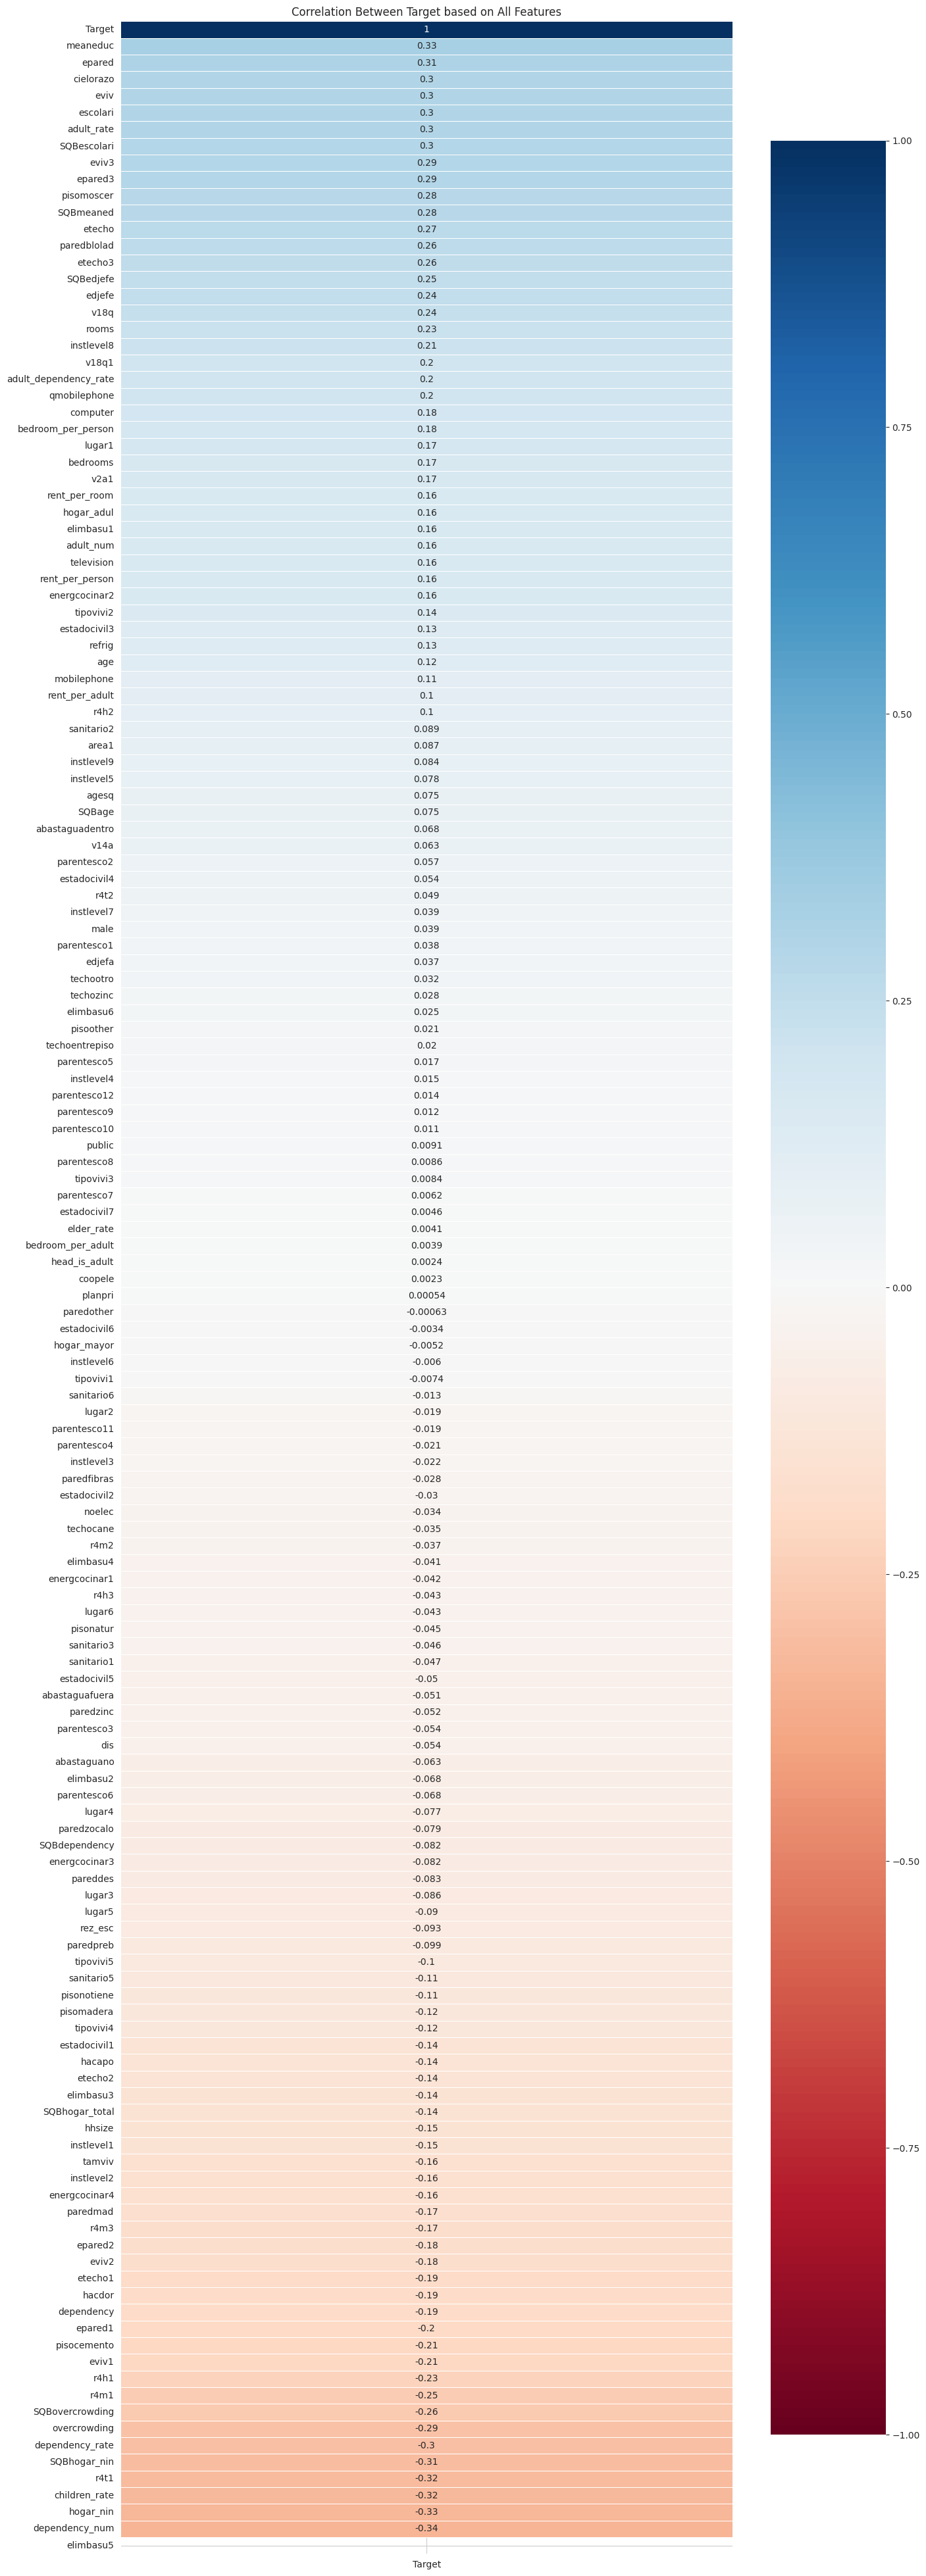

In [ ]:
plt.figure(figsize=(15,50))
plt.title('Correlation Between Target based on All Features')
sns.heatmap(df.corr()[['Target']].sort_values(by='Target', ascending=False),cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 10px; line-height: 1; border-radius:10px"><b>1. Dividing the dataset into training and test sets 📝</b></h3>

In [ ]:
# Drop columns
df.drop(columns = fea_id, inplace = True)

In [ ]:
df_train=df[df['Target'].notnull()]
df_test=df[df['Target'].isnull()].drop(columns='Target')

In [ ]:
def prepare_X_y(df):
    X = df.drop(columns = 'Target', axis = 1)
    # y = df['Target'] - 1
    y = df_train.Target.to_numpy().astype('int') - 1
    return X, y

X, y = prepare_X_y(df_train)

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 10px; line-height: 1; border-radius:10px"><b>2. Model Training 📝</b></h3>

In [ ]:
RANDOM_STATE = 7
TRAIN_SIZE = 0.8
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 10px; line-height: 1; border-radius:10px"><b>3. Model Evaluation 📝</b></h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

**Common algorithms for multiclass classification include Random Forest, Support Vector Machines (SVM), Gradient Boosting, or Neural Networks, Naive Bayes, KNN**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from xgboost import XGBClassifier # XGBClassifier
from sklearn.svm import SVC # SVM
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.neural_network import MLPClassifier # Neural network
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB, BernoulliNB # NB
from sklearn.svm import SVC #SVM
from lightgbm import LGBMClassifier

In [ ]:
models = []
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('K-Nearest Neighbors Classifier', KNeighborsClassifier())) # KNN
models.append(('Neural Networks', MLPClassifier())) # Multi-Layer Perceptron
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('Support Vector Machines Classifier', SVC()))
models.append(('LGBM Classifier', LGBMClassifier()))
print(models)

[('Gaussian Naive Bayes', GaussianNB()), ('Random Forest', RandomForestClassifier()), ('K-Nearest Neighbors Classifier', KNeighborsClassifier()), ('Neural Networks', MLPClassifier()), ('Gradient Boosting Classifier', GradientBoostingClassifier()), ('Support Vector Machines Classifier', SVC()), ('LGBM Classifier', LGBMClassifier())]


In [ ]:
target_names = ['class 1', 'class 2', 'class 3', 'class 4']

In [ ]:
accuracy_scores = []
recalls_scores = []
f1_scores = []
names = []
for name, model in models:
  pipeline = Pipeline([
		('scaler', StandardScaler()),
		('classifier', model) # Model
	])
  # Fit the pipeline on the training data
  pipeline.fit(X_train, y_train)

  # Make predictions on the testing data
  y_pred = pipeline.predict(X_test)

  # Evaluate the model
  # print(classification_report(y_test, y_pred))
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='macro')
  accuracy_scores.append(f'{str(round(accuracy * 100, 2))}%')
  f1_scores.append(f'{str(round(f1 * 100, 2))}%')
  names.append(name)


In [ ]:
modeling_scores = pd.DataFrame({"name": names, "accuracy score": accuracy_scores, "f1-score macro": f1_scores}).sort_values(by=['f1-score macro'], ascending=False)
display(modeling_scores)

,name,accuracy score,f1-score macro
1,Random Forest,93.57%,90.02%
6,LGBM Classifier,90.48%,85.59%
3,Neural Networks,86.87%,79.16%
2,K-Nearest Neighbors Classifier,80.54%,71.0%
4,Gradient Boosting Classifier,76.1%,61.0%
5,Support Vector Machines Classifier,76.41%,59.14%
0,Gaussian Naive Bayes,21.13%,19.04%


Random Forest là mô hình có f1-score macro cao nhất. Thực hiện tuning hyperparameter để ra kết quả cao hơn

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:lightblue; font-family:Tahoma; color: black; padding: 10px; line-height: 1; border-radius:10px"><b>4. Hyperparameter Tuning 📝</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.1 KNN</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.2 SVM</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.3 Random Forest</b></h3>

In [ ]:
# Create a pipeline with preprocessing steps and SVC classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    "classifier__n_estimators": [1, 5, 50, 100, 500, 1000]
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs = -1)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

grid_search

# Access the best parameters and best score found during the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict the label for the test set using the best model
best_model = grid_search.best_estimator_
print('Best Model: ', best_model)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the result
print("Accuracy:", round(accuracy*100, 2), "%")
print("Precision:", round(precision*100, 2), "%")
print("Recall:", round(recall*100, 2), "%")
print("F1-score:", round(f1*100, 2), "%")

Best Parameters: {'classifier__n_estimators': 500}
Best Score: 0.9107913669064749
Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=500))])
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       150
           1       0.91      0.86      0.89       311
           2       0.96      0.79      0.87       242
           3       0.93      1.00      0.96      1209

    accuracy                           0.93      1912
   macro avg       0.94      0.86      0.90      1912
weighted avg       0.93      0.93      0.93      1912

Accuracy: 93.31 %
Precision: 93.74 %
Recall: 86.49 %
F1-score: 89.74 %


In [ ]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 93.31 %


### **Importance of Features in RandomForestClassifier**

In [ ]:
# Get feature importances
feature_importances = best_model.named_steps['classifier'].feature_importances_

imp_df = pd.DataFrame({"Feature Name":X_train.columns,
                      "Importance":feature_importances})

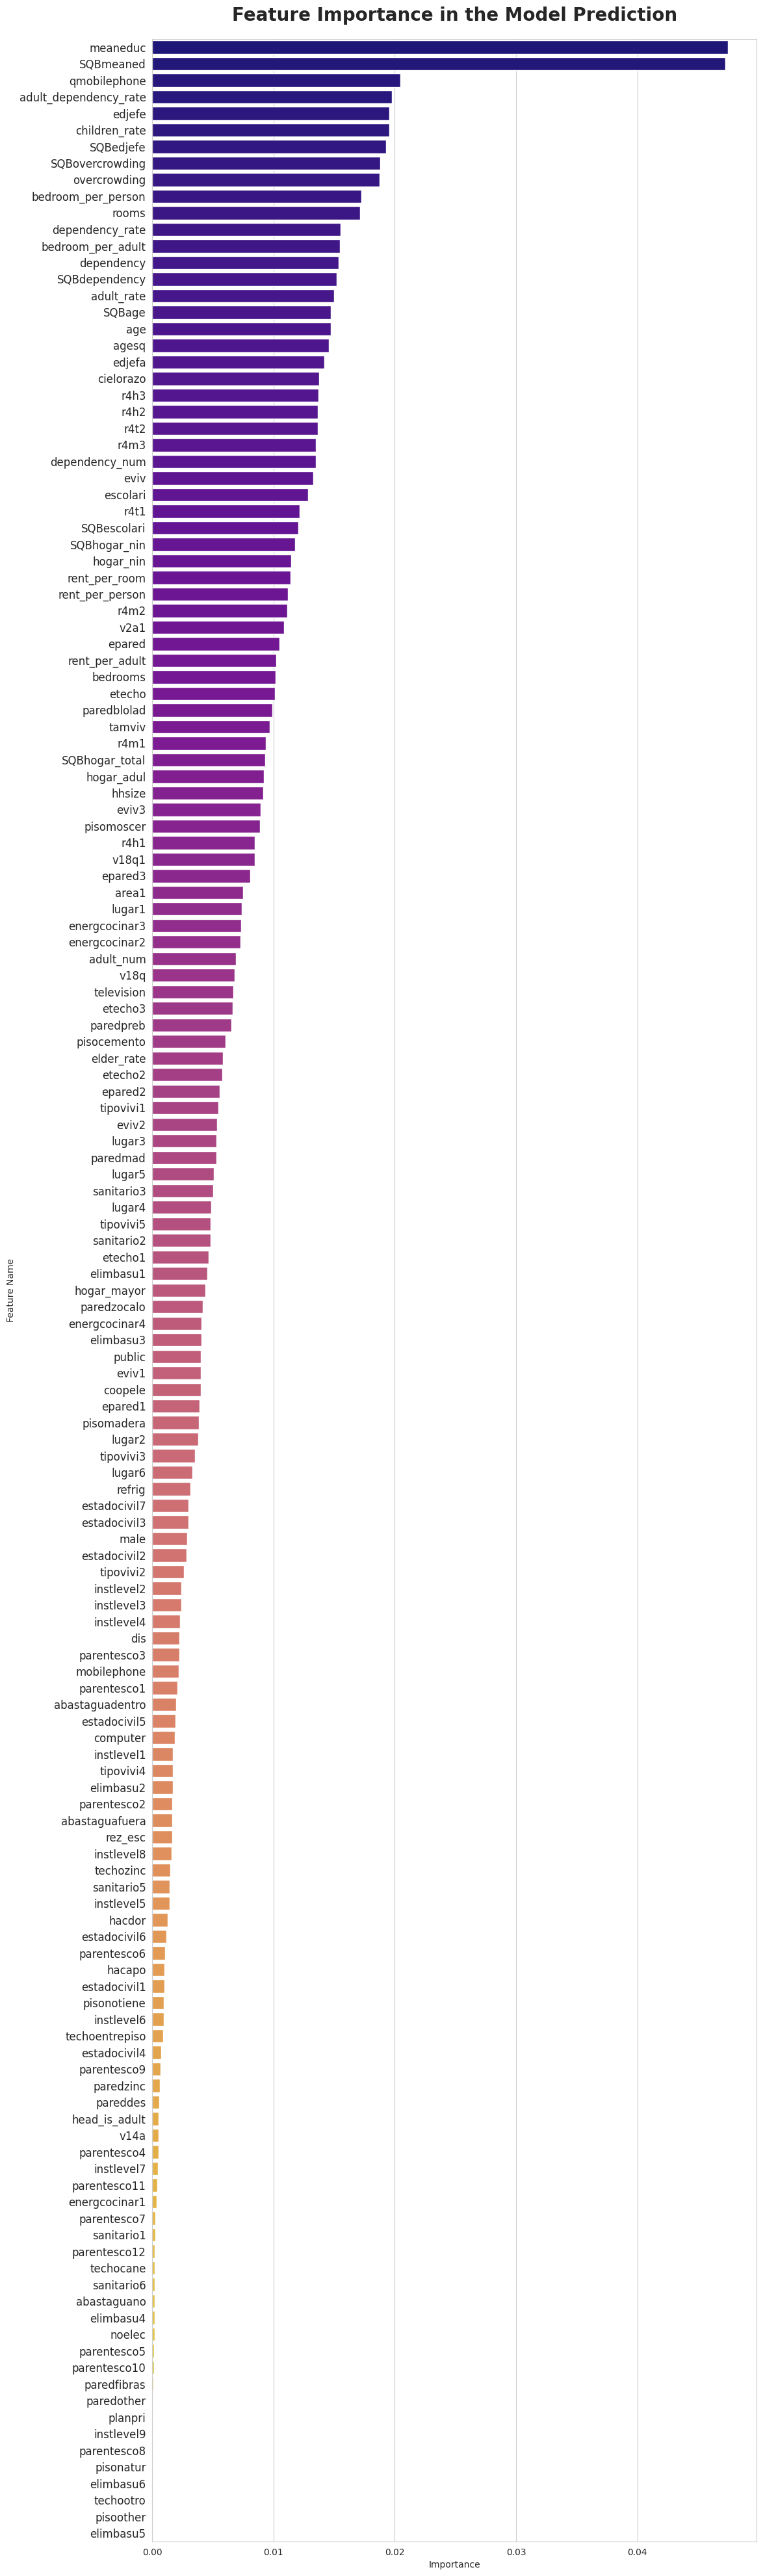

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,50))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.4 Neural Network</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.5 LGBM Classifier</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.6 Gaussian Naive Bayes</b></h3>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: darkgreen; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>4.7 Gradient Boosting Classifier</b></h3>

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #E9F7EF; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:300%; text-align:center;padding: 0px;"> Conclusion</p></div>

## Prediction for testing test

In [ ]:
prediction = best_model.predict(df_test)

In [ ]:
print(Counter(prediction.tolist()))

Counter({3: 18898, 1: 3440, 0: 769, 2: 749})


In [ ]:
print(Counter(best_model.predict(X_test)))

Counter({3: 1292, 1: 292, 2: 197, 0: 131})
